In [161]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

from PIL import Image

plt.ion()   # interactive mode

data_dir = "data_preprocessed/"

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [162]:
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""
    
    def __call__(self, image):
        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        
        return torch.from_numpy(image.transpose((2, 0, 1)))

data_transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [163]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transform)
                  for x in ['train', 'test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=14)
              for x in ['train', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}
class_names = image_datasets['train'].classes

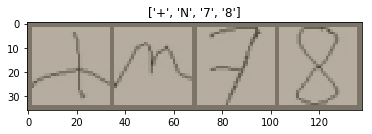

In [164]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders["train"]))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])


In [165]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 50, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(50, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 82)

    def forward(self, x):
        x=x.to(device)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [166]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dataloaders["train"], 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 3.129
[1,  4000] loss: 1.414
[1,  6000] loss: 0.914
[1,  8000] loss: 0.751
[1, 10000] loss: 0.663
[1, 12000] loss: 0.625
[1, 14000] loss: 0.540
[1, 16000] loss: 0.525
[1, 18000] loss: 0.482
[1, 20000] loss: 0.479
[1, 22000] loss: 0.437
[1, 24000] loss: 0.430
[1, 26000] loss: 0.424
[1, 28000] loss: 0.396
[1, 30000] loss: 0.391
[1, 32000] loss: 0.384
[1, 34000] loss: 0.356
[1, 36000] loss: 0.359
[1, 38000] loss: 0.368
[1, 40000] loss: 0.352
[1, 42000] loss: 0.336
[1, 44000] loss: 0.320
[1, 46000] loss: 0.334
[1, 48000] loss: 0.324
[1, 50000] loss: 0.323
[1, 52000] loss: 0.317
[1, 54000] loss: 0.299
[1, 56000] loss: 0.306
[1, 58000] loss: 0.316
[1, 60000] loss: 0.295
[1, 62000] loss: 0.276
[1, 64000] loss: 0.301
[1, 66000] loss: 0.294
[1, 68000] loss: 0.265
[1, 70000] loss: 0.309
[1, 72000] loss: 0.284
[1, 74000] loss: 0.285
[2,  2000] loss: 0.259
[2,  4000] loss: 0.267
[2,  6000] loss: 0.256
[2,  8000] loss: 0.250
[2, 10000] loss: 0.244
[2, 12000] loss: 0.243
[2, 14000] 

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fab97b6b240>>
Traceback (most recent call last):
  File "/home/deepafricai/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 402, in __del__
    self._shutdown_workers()
  File "/home/deepafricai/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 381, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/deepafricai/anaconda3/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/deepafricai/anaconda3/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/deepafricai/anaconda3/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/deepafricai/anaconda3/lib/python3.6/multiprocessing/

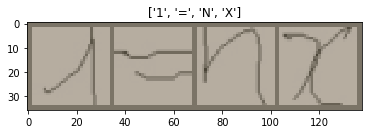

In [280]:
dataiter = iter(dataloaders['test'])
images, classes = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images), title=[class_names[x] for x in classes])

outputs = net(images)

In [281]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_names[x] for x in predicted))
#class_names[x] for x in classes

Predicted:      1     =     N     X


In [282]:
correct = 0
total = 0
with torch.no_grad():
    for data in dataloaders["test"]:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on test images: 94 %


In [170]:
print("Model's state_dict:")
for param_tensor in net.state_dict():
    print(param_tensor, "\t", net.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([50, 3, 5, 5])
conv1.bias 	 torch.Size([50])
conv2.weight 	 torch.Size([16, 50, 5, 5])
conv2.bias 	 torch.Size([16])
fc1.weight 	 torch.Size([120, 400])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([82, 120])
fc2.bias 	 torch.Size([82])
Optimizer's state_dict:
state 	 {140374964835168: {'momentum_buffer': tensor([[[[-0.0761, -0.1922, -0.1658, -0.1140, -0.1261],
          [-0.1754, -0.3194, -0.0902, -0.1271, -0.1158],
          [-0.1905, -0.2407, -0.1565, -0.1087, -0.1027],
          [-0.2059, -0.2005, -0.0405, -0.0322,  0.0430],
          [ 0.0022,  0.1194,  0.1215,  0.0965,  0.0305]],

         [[-0.0761, -0.1922, -0.1658, -0.1140, -0.1261],
          [-0.1754, -0.3194, -0.0902, -0.1271, -0.1158],
          [-0.1905, -0.2407, -0.1565, -0.1087, -0.1027],
          [-0.2059, -0.2005, -0.0405, -0.0322,  0.0430],
          [ 0.0022,  0.1194,  0.1215,  0.0965,  0.0305]],

         [[-0.0761, -0.1922, -0.1658, -0.1140, -0.1261],
        

In [171]:
torch.save(net.state_dict(), "saved_model.pt")

In [172]:
model = Net()
model.load_state_dict(torch.load("saved_model.pt"))
model.eval()
model.to(device)

Net(
  (conv1): Conv2d(3, 50, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(50, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=82, bias=True)
)

In [216]:
def image_loader(loader, image_name):
    """load image, returns cuda tensor"""
    image = Image.open(image_name)
    image = loader(image).float()

    return np.array(image)

#image = image_loader(data_transform, "test.jpg")
#image = image.to(device)
#model(image)
image = image_loader(data_transform, "test.jpg")
print(type(image.shape)

<class 'numpy.ndarray'>


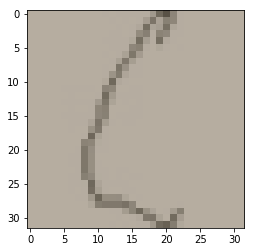

In [191]:
imshow(image.cpu(), "")